# Extrapolation Detection (4.3) Simulation
Ant Ngo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn.datasets import load_boston

**Model distribution:**

$Y = 10X^{2}_{1} + \mathbb{1}_{X_{2} \geq 0} + \varepsilon$,

$\varepsilon \overset{\text{iid}}{\sim} \mathcal{N}(0, .1^{2}), \begin{bmatrix}
X_1\\
X_2
\end{bmatrix}
\sim \begin{cases}
U(-1,0), U(-1,0) &\text{w.p. $\frac{1}{3}$}\\
U(0,1), U(-1,0) &\text{w.p. $\frac{1}{3}$}\\
U(-1,0), U(0,1) &\text{w.p. $\frac{1}{3}$}\\
U(0,1), U(0,1) &\text{w.p. $0$}\\
\end{cases}$

In [2]:
def extrap_ex_sim(N, seed = None):
    '''
    #' Generates simulated data in 
    #' Section 4.3 Extrapolation Detection
    #' @param N Number of samples to generate.
    #' @param seednum Random seed for reproducibility.
    #' @return Simulated data (dataframe) with N observations.
    #' @examples
    #' extrap_ex_sim(1000,1)
    #' extrap_ex_sim(3000,420)
    '''
    # force seed if not defined
    if seed is None:
        np.random.seed(seed)
    
    def simulate():
        '''
        #' Helper to simulate one observation
        #' @return Single randomly generated observation
        #' based on 4.3 distribution.
        '''

        # generate random probability (0-1)
        s = np.random.uniform(low = 0, high = 1)

        # get distribution for x1, x2
        if s < (1/3):
            x1 = np.random.uniform(low = -1, high = 0, size = 1)
            x2 = np.random.uniform(low = -1, high = 0, size = 1)
        else:
            if s < (2/3):
                x1 = np.random.uniform(low = -1, high = 0, size = 1)
                x2 = np.random.uniform(low = 0, high = 1, size = 1)
            else:
                x1 = np.random.uniform(low = 0, high = 1, size = 1)
                x2 = np.random.uniform(low = -1, high = 0, size = 1)

        # generate single observation
        single_obs = np.concatenate((x1,x2), axis = 0)

        return single_obs
 
    
    # set distribution params
    b1, b2, sd = 10, 1, 0.1
    
    # matrix initialization
    X = np.full([N, 2], None)
    
    # simulate feature matrix
    for i in range(0,N):
        X[i,] = simulate()
        
    # create epsilon (noise)
    noise = sp.stats.norm.rvs(size=N)
    
    # generate Y
    y = b1 * (X[:,0]**2) + b2 *(X[:,1]>0) + noise
    y = y.reshape(-1,1)
    
    # concat feature matrix and target vector
    df = np.concatenate([X,y], axis = 1)
    
    # convert to df
    df = pd.DataFrame(df, columns = ['x1','x2','y'])
    
    return df

In [3]:
df = extrap_ex_sim(1000)


In [4]:
X = df[['x1','x2']]
y = df['y']

In [5]:
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(X, y)

RandomForestRegressor(n_estimators=500)

# Use Class

In [40]:
ice = ICE("continuous", trace = False)

In [41]:
ice.fit_single_feature(X, rf, "x1")

Fit x1 in 2 seconds


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'x1 ICE Plot'}, xlabel='x1', ylabel='Target'>)

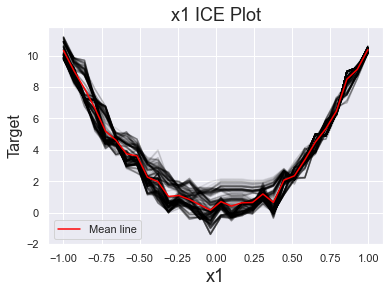

In [42]:
ice.ice_plot_single_feature('x1')

In [43]:
ice.fit(X, rf)

Fit x1 in 2 seconds
Fit x2 in 3 seconds


0 0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

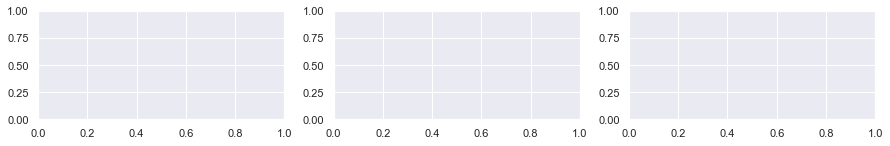

In [44]:
ice.ice_plot(results_root("ice-plot-from-class/all_plots_simulation_ant.pdf"))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

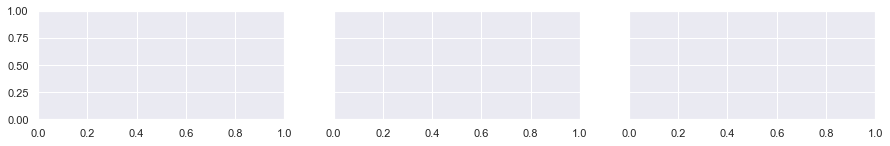

In [14]:
ice.feature_importance_hist(results_root("ice-plot-from-class/all_histograms_simulation_ant.pdf"))